# Uber Supply and Demand Gap


### There are six attributes associated with each request made by a customer:

- Request id: A unique identifier of the request
- Time of request: The date and time at which the customer made the trip request
- Drop-off time: The drop-off date and time, in case the trip was completed 
- Pick-up point: The point from which the request was made
- Driver id: The unique identification number of the driver
- Status of the request: The final status of the trip, can be either completed, canceled by the driver or no cars are available

**Note: For this assignment, only the trips to and from the airport are being considered.**

 

### Data Cleaning and Preparation 

In [1]:
# locate working directory
%cd "D:\OneDrive - Kansas State University\Master of Data Science  - UoA\Course 2 - Data Mining and Discovery\Assignment Uber Supply Demand Gap"

D:\OneDrive - Kansas State University\Master of Data Science  - UoA\Course 2 - Data Mining and Discovery\Assignment Uber Supply Demand Gap


In [2]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline
import seaborn as sns
import datetime as dt

# import warnings
import warnings 
warnings.filterwarnings("ignore")

In [3]:
df = pd.read_csv("Uber Request Data.csv")

In [4]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,11/7/2016 11:51,11/7/2016 13:00
1,867,Airport,1.0,Trip Completed,11/7/2016 17:57,11/7/2016 18:47
2,1807,City,1.0,Trip Completed,12/7/2016 9:17,12/7/2016 9:58
3,2532,Airport,1.0,Trip Completed,12/7/2016 21:08,12/7/2016 22:03
4,3112,City,1.0,Trip Completed,13-07-2016 08:33:16,13-07-2016 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,15-07-2016 23:49:03,NaN
6741,6752,Airport,NaN,No Cars Available,15-07-2016 23:50:05,NaN
6742,6751,City,NaN,No Cars Available,15-07-2016 23:52:06,NaN
6743,6754,City,NaN,No Cars Available,15-07-2016 23:54:39,NaN


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Request id         6745 non-null   int64  
 1   Pickup point       6745 non-null   object 
 2   Driver id          4095 non-null   float64
 3   Status             6745 non-null   object 
 4   Request timestamp  6745 non-null   object 
 5   Drop timestamp     2831 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 316.3+ KB


In [6]:
#df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], dayfirst = True)

#--> For some reason, my Jupyter only runs with this command
df['Drop timestamp'] = pd.to_datetime(df['Drop timestamp'], format='mixed', dayfirst = True) #--> For some reason, my Jupyter only runs with this command

In [7]:
#df['Request timestamp'] = pd.to_datetime(df['Request timestamp'])

#--> For some reason, my Jupyter only runs with this command
df['Request timestamp'] = pd.to_datetime(df['Request timestamp'], format = 'mixed', dayfirst = True) #--> For some reason, my Jupyter only runs with this command

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6745 entries, 0 to 6744
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Request id         6745 non-null   int64         
 1   Pickup point       6745 non-null   object        
 2   Driver id          4095 non-null   float64       
 3   Status             6745 non-null   object        
 4   Request timestamp  6745 non-null   datetime64[ns]
 5   Drop timestamp     2831 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), int64(1), object(2)
memory usage: 316.3+ KB


In [9]:
df

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47
...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT


In [10]:
df[df['Driver id'].isna()]['Status'].unique()

array(['No Cars Available'], dtype=object)

In [11]:
df[df['Drop timestamp'].isna()]['Status'].unique()

array(['Cancelled', 'No Cars Available'], dtype=object)

In [12]:
df[(df['Drop timestamp'].isna()) & (~df['Driver id'].isna())].Status.unique()

array(['Cancelled'], dtype=object)

From first glance at the data, `Driver id` and `Drop timestamp` are two columns with substantial `NaN` values.

Individually, with `Drop timestamp` column that contains `NaN`, the `Status` is due to `Cancelled` and `No Cars Available`; with `Driver id` column that contains `NaN`, the `Status` is solely due to `No Cars Available`. 

When we combined conditions, `Drop timestamp` is null and `Driver id` not null, the `Status` is `Cancelled`

In [13]:
# Make a copy of df to perform data mining
df1 = df.copy()

In [14]:
# Creating new columns illustraing when the request to generated
df1['Request Date'] = df1['Request timestamp'].dt.date
df1['Request Hour'] = df1['Request timestamp'].dt.hour

In [15]:
# Create a function to categorize different time of the day:

def time_of_day(x):
    if x in range(5,12):
        return "Morning"
    elif x in range(12,18):
        return "Afternoon"
    elif x in range(18, 23):
        return "Evening"
    else:
        return "Midnight"

In [16]:
df1['Time of day'] = df1['Request Hour'].apply(time_of_day)

In [17]:
df1['Request Weekday'] = df1['Request timestamp'].apply(lambda x: dt.datetime.strftime(x, '%A'))

In [18]:
df1 

,Request id,Pickup point,Driver id,Status,Request timestamp,Drop timestamp,Request Date,Request Hour,Time of day,Request Weekday
0,619,Airport,1.0,Trip Completed,2016-07-11 11:51:00,2016-07-11 13:00:00,2016-07-11,11,Morning,Monday
1,867,Airport,1.0,Trip Completed,2016-07-11 17:57:00,2016-07-11 18:47:00,2016-07-11,17,Afternoon,Monday
2,1807,City,1.0,Trip Completed,2016-07-12 09:17:00,2016-07-12 09:58:00,2016-07-12,9,Morning,Tuesday
3,2532,Airport,1.0,Trip Completed,2016-07-12 21:08:00,2016-07-12 22:03:00,2016-07-12,21,Evening,Tuesday
4,3112,City,1.0,Trip Completed,2016-07-13 08:33:16,2016-07-13 09:25:47,2016-07-13,8,Morning,Wednesday
...,...,...,...,...,...,...,...,...,...,...
6740,6745,City,NaN,No Cars Available,2016-07-15 23:49:03,NaT,2016-07-15,23,Midnight,Friday
6741,6752,Airport,NaN,No Cars Available,2016-07-15 23:50:05,NaT,2016-07-15,23,Midnight,Friday
6742,6751,City,NaN,No Cars Available,2016-07-15 23:52:06,NaT,2016-07-15,23,Midnight,Friday
6743,6754,City,NaN,No Cars Available,2016-07-15 23:54:39,NaT,2016-07-15,23,Midnight,Friday


## Exploratory Data Analysis

We will divide the `df1` data set into 2 separated dataframes, one denotes pick-up from Airport, the other one from City, so that we can see better the differences 

Before doing that, let's go over the big picture of the Trip Status

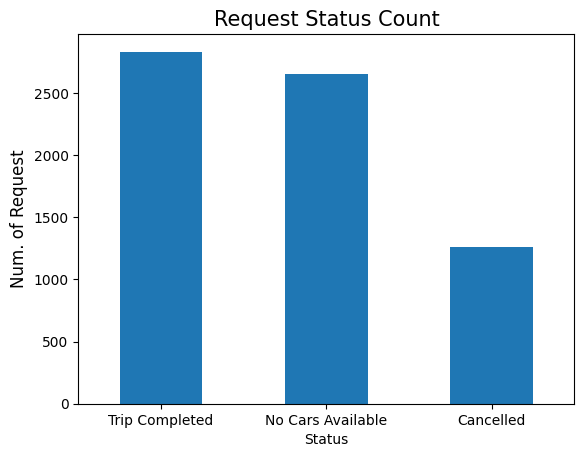

In [19]:
df1.Status.value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title("Request Status Count", fontsize = 15)
plt.ylabel("Num. of Request", fontsize = 12)
plt.show()

In [20]:
print("Trip Status Count:")
df1['Status'].value_counts()

Trip Status Count:


Status
Trip Completed       2831
No Cars Available    2650
Cancelled            1264
Name: count, dtype: int64

In [21]:
print("Trip Status percentage: ")
df1['Status'].value_counts(normalize = True)*100

Trip Status percentage: 


Status
Trip Completed       41.971831
No Cars Available    39.288362
Cancelled            18.739807
Name: proportion, dtype: float64

### Pick up point - City

In [22]:
city_df1 = df1[df1['Pickup point'] == 'City']

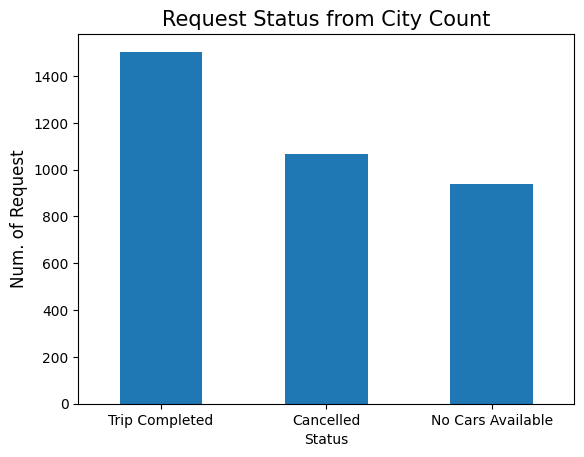

In [23]:
city_df1.Status.value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title("Request Status from City Count", fontsize = 15)
plt.ylabel("Num. of Request", fontsize = 12)
plt.show()

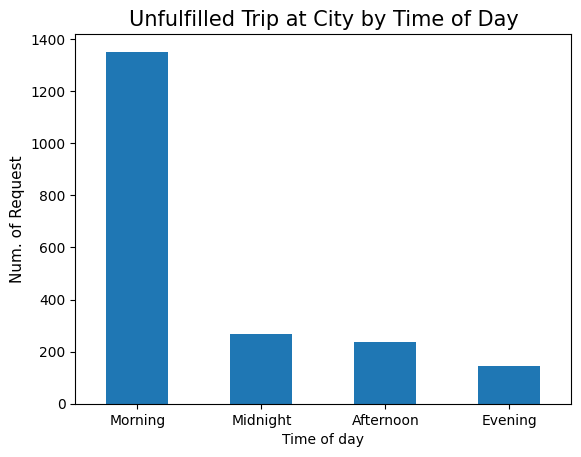

In [24]:
plt.rcdefaults()
city_df1[city_df1['Status'].isin(["No Cars Available", "Cancelled"])]['Time of day'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title("Unfulfilled Trip at City by Time of Day", fontsize = 15)
plt.ylabel("Num. of Request", fontsize = 11)
plt.show()

In [48]:
# Unfulfilled Trip at City by Time of Day table
city_unful_timeday = city_df1[city_df1["Status"].isin(["Cancelled", "No Cars Available"])]\
.pivot_table(index = "Time of day"\
             , columns = "Status"\
             , values = "Request id"\
             , aggfunc = "count")

city_unful_timeday['Total'] = city_unful_timeday['No Cars Available'] + city_unful_timeday['Cancelled']
city_unful_timeday["Percentage"] = 100*city_unful_timeday["Total"]/city_unful_timeday['Total'].sum()
city_unful_timeday

Status,Cancelled,No Cars Available,Total,Percentage
Time of day,,,,
Afternoon,57,181,238,11.882177
Evening,53,92,145,7.239141
Midnight,73,196,269,13.429855
Morning,883,468,1351,67.448827


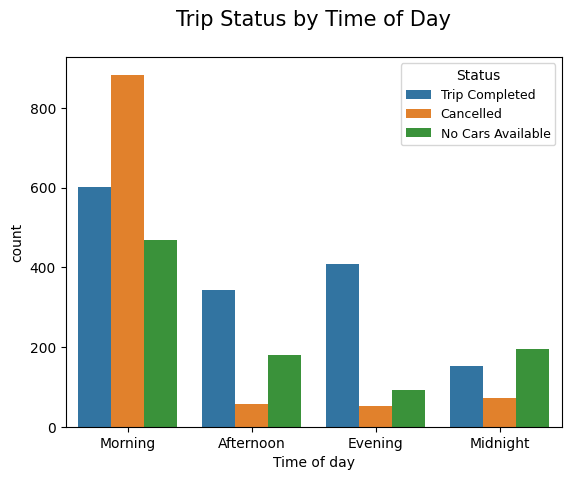

In [25]:
plt.rcdefaults()
sns.countplot(x = 'Time of day', hue = 'Status', data = city_df1)
plt.xticks(rotation = 0)
plt.title("Trip Status by Time of Day" + "\n", fontsize = 15)
plt.legend(title = "Status", loc = "upper right", fontsize = 9)
plt.show()

In [26]:
city_stat_timeday = city_df1.pivot_table(index = "Time of day"\
                                         , columns = "Status"\
                                         , values = "Request id"\
                                         , aggfunc = "count")

city_stat_timeday['Supply Demand Gap'] = city_stat_timeday['Trip Completed'] - (city_stat_timeday['Cancelled']+city_stat_timeday['No Cars Available'])

In [27]:
city_stat_timeday

Status,Cancelled,No Cars Available,Trip Completed,Supply Demand Gap
Time of day,,,,
Afternoon,57,181,343,105
Evening,53,92,408,263
Midnight,73,196,152,-117
Morning,883,468,601,-750


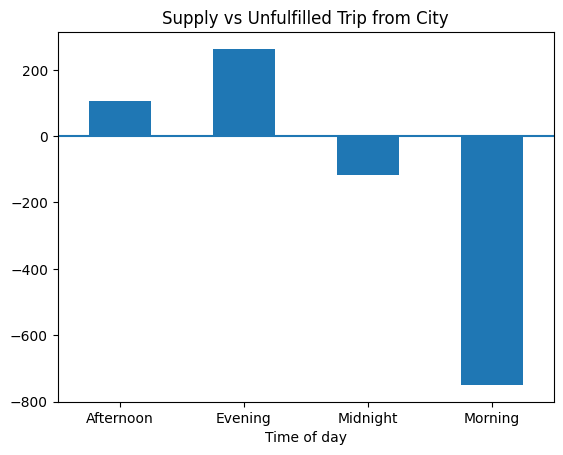

In [28]:
city_stat_timeday['Supply Demand Gap'].plot.bar()
plt.xticks(rotation = 0)
plt.axhline(y=0, xmin=0, xmax= 1.8)
plt.title("Supply vs Unfulfilled Trip from City")
plt.show()

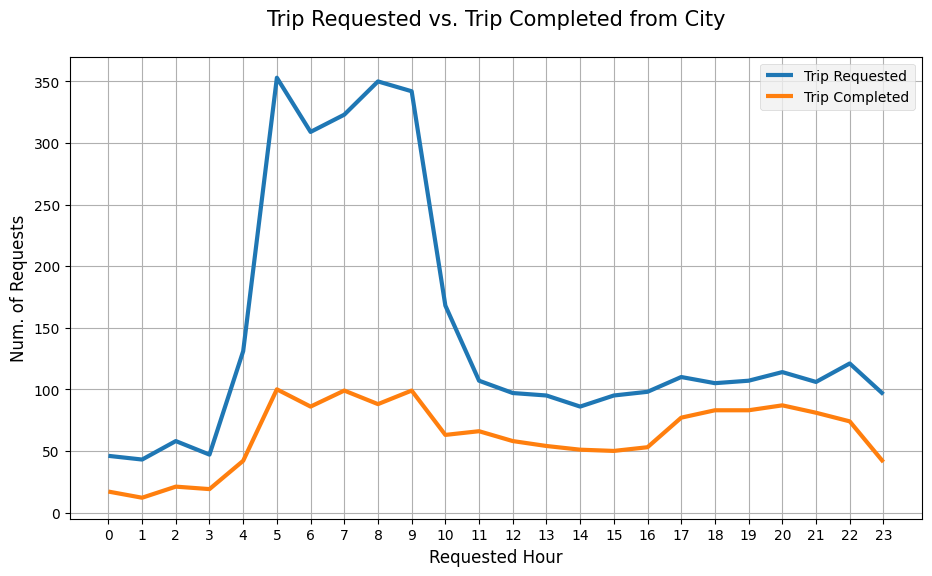

In [29]:
fig, ax = plt.subplots( figsize = (11,6) )
plt.style.use("fivethirtyeight")
city_df1['Request Hour'].value_counts().sort_index().plot(ax = ax, label = "Trip Requested"\
                                                         , linewidth = 3)
completed_city_df1 = city_df1[ city_df1['Status'] == 'Trip Completed']
completed_city_df1['Request Hour'].value_counts().sort_index().plot(ax = ax, label = "Trip Completed"\
                                                                   ,linewidth = 3)
plt.grid("on")
plt.xticks([i for i in range(0,24)])
plt.legend(fontsize = 10)
plt.title("Trip Requested vs. Trip Completed from City" + "\n", fontsize = 15)
plt.ylabel("Num. of Requests", fontsize = 12)
plt.xlabel("Requested Hour", fontsize = 12)
plt.style.use("fivethirtyeight")
plt.show()

### Pickup Point - Airport

In [30]:
airport_df1 = df1[df1['Pickup point'] == 'Airport']

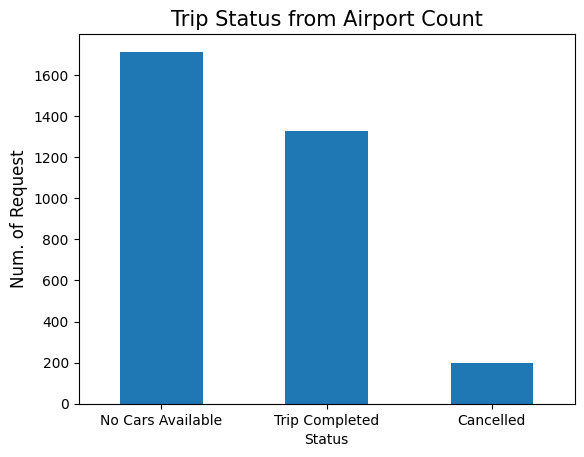

In [31]:
plt.rcdefaults()
airport_df1.Status.value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title("Trip Status from Airport Count", fontsize = 15)
plt.ylabel("Num. of Request", fontsize = 12)
plt.xlabel("Status")
plt.show()

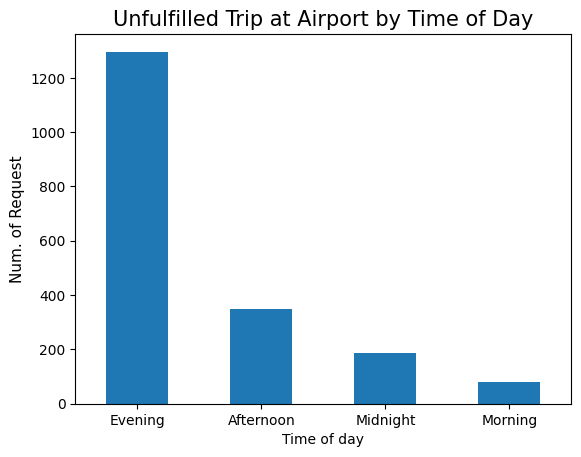

In [32]:
airport_df1[airport_df1['Status'].isin(["No Cars Available", "Cancelled"])]['Time of day'].value_counts().plot.bar()
plt.xticks(rotation = 0)
plt.title("Unfulfilled Trip at Airport by Time of Day", fontsize = 15)
plt.ylabel("Num. of Request", fontsize = 11)
plt.show()

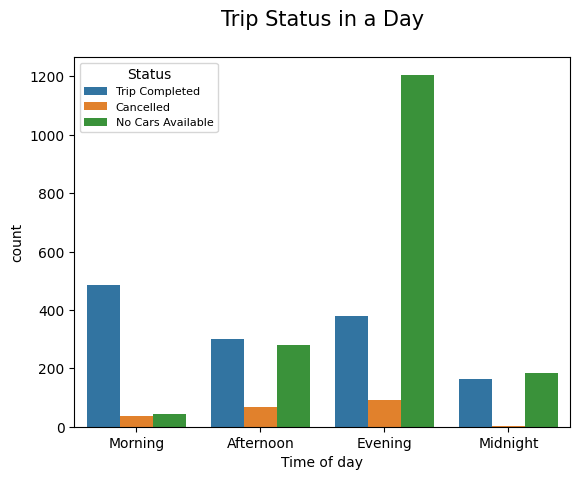

In [33]:
plt.rcdefaults()
sns.countplot(x = 'Time of day', hue = 'Status', data = airport_df1)
plt.xticks(rotation = 0)
plt.title("Trip Status in a Day" + "\n", fontsize = 15)
plt.legend(title = "Status", loc = "upper left", fontsize = 8)
plt.show()

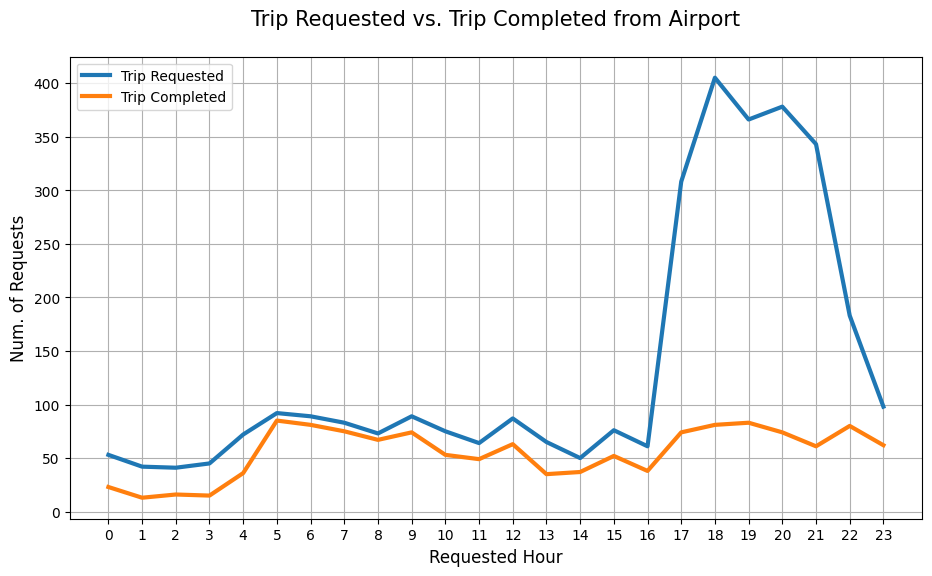

In [34]:
fig, ax = plt.subplots( figsize = (11,6) )
airport_df1['Request Hour'].value_counts().sort_index().plot(ax = ax, label = "Trip Requested", linewidth = 3)
completed_port_df1 = airport_df1[ airport_df1['Status'] == 'Trip Completed']
completed_port_df1['Request Hour'].value_counts().sort_index().plot(ax = ax, label = "Trip Completed", linewidth = 3)
plt.grid("on")
plt.xticks([i for i in range(0,24)])
plt.legend(fontsize = 10)
plt.title("Trip Requested vs. Trip Completed from Airport" + "\n", fontsize = 15)
plt.xlabel("Requested Hour", fontsize = 12)
plt.ylabel("Num. of Requests", fontsize = 12)   

# The Trip Completed line represents the number of requests that got completed
# whereas the Requested Trip Line represents the number of requests (completed and incompleted)

plt.style.use("fivethirtyeight")
plt.show()

### City and Airport 

We will put City and Airport data visualizations side by side and explore them, then search for the deep issues and reasons behind them.

#### Peak hour

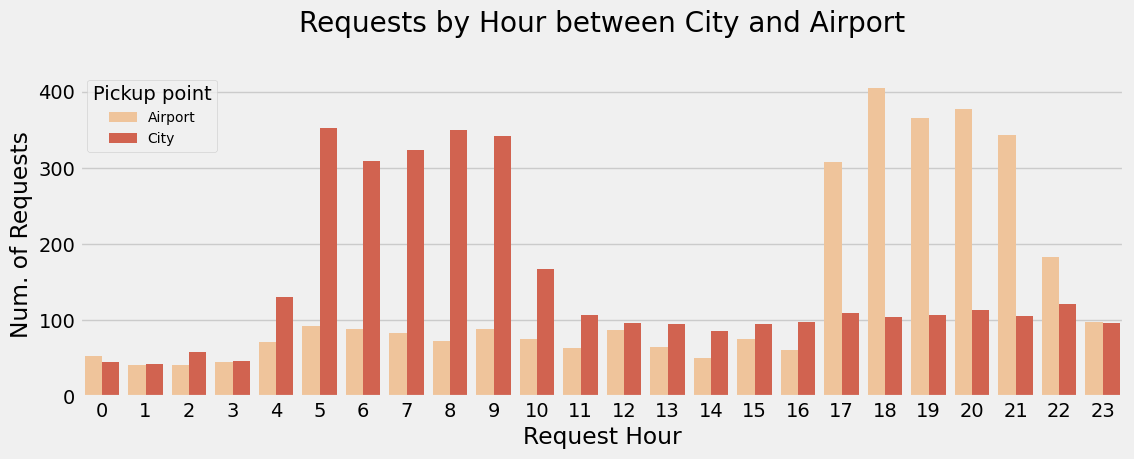

In [35]:
plt.figure( figsize=  (12,4) )
sns.countplot(x = 'Request Hour', hue = 'Pickup point', data = df1, palette = "OrRd")
plt.legend(title = "Pickup point", loc = "upper left", fontsize = 10)
plt.title("Requests by Hour between City and Airport" + "\n")
plt.ylabel("Num. of Requests")
plt.style.use("seaborn-v0_8-pastel")
plt.show()

#### Heat Map

In [36]:
res = pd.pivot_table(data = df1, index = 'Pickup point', columns = 'Request Weekday', values = 'Request id', aggfunc = 'count')
res

Request Weekday,Friday,Monday,Thursday,Tuesday,Wednesday
Pickup point,,,,,
Airport,629,661,601,684,663
City,752,706,752,623,674


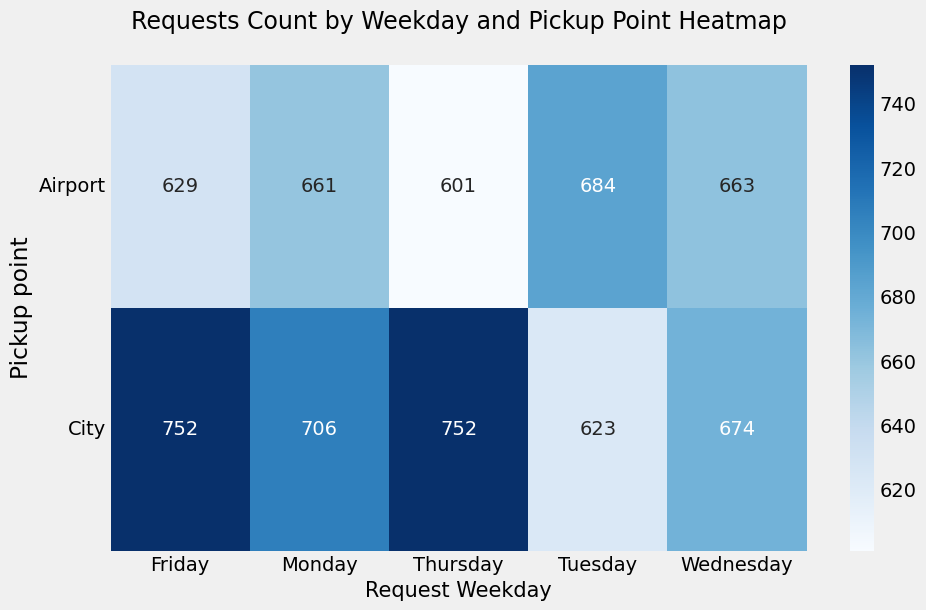

In [37]:
plt.figure( figsize = (10,6))
sns.heatmap(res, annot = True, cmap='Blues', fmt='.4g')
plt.title("Requests Count by Weekday and Pickup Point Heatmap" + "\n", fontsize = 17)
plt.yticks(rotation = 0)
plt.xlabel("Request Weekday", fontsize = 15)
plt.show()

****Important note** -- There are only 5 dates being recorded in the data set, so based on *given data*, **Friday, Monday and Thursday** appear to have packed high number of requests **(Demand)** for Uber rides from **City**.

In [38]:
res1 = pd.pivot_table(data = df1[df1['Status'].isin(["No Cars Available", "Cancelled"])]\
                     , index = 'Pickup point'\
                     , columns = 'Request Weekday'\
                     , values = 'Request id'\
                     , aggfunc = 'count')
res1

Request Weekday,Friday,Monday,Thursday,Tuesday,Wednesday
Pickup point,,,,,
Airport,361,380,410,395,365
City,459,386,413,350,395


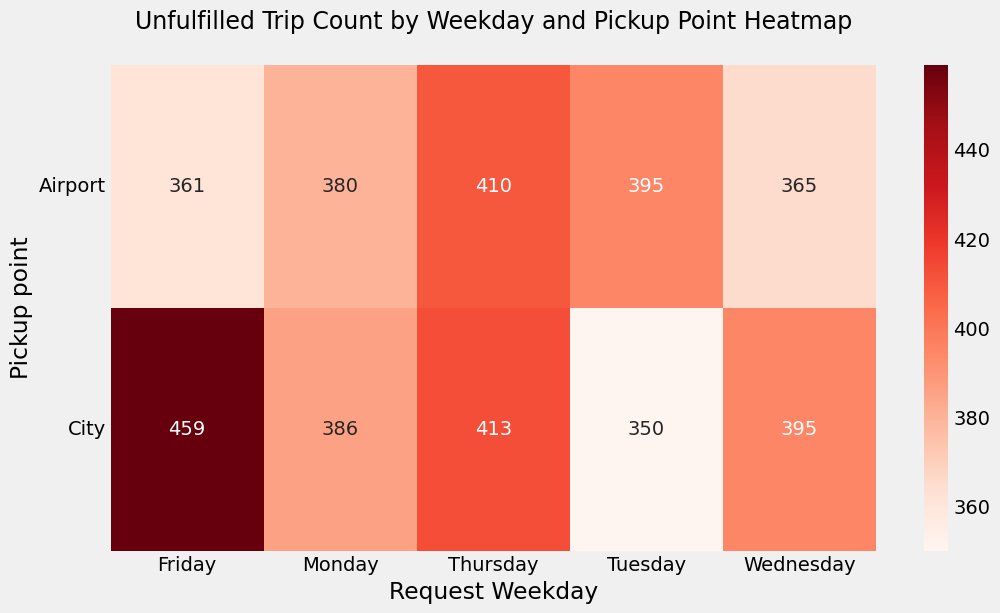

In [39]:
plt.figure( figsize = (11,6))
sns.heatmap(res1, annot = True, cmap='Reds', fmt='.3g')
plt.title("Unfulfilled Trip Count by Weekday and Pickup Point Heatmap" + "\n", fontsize = 17)
plt.yticks(rotation = 0)
plt.show()

In [40]:
res2 = pd.pivot_table(data = df1[df1['Status'] == "Trip Completed"]\
                     , index = 'Pickup point'\
                     , columns = 'Request Weekday'\
                     , values = 'Request id'\
                     , aggfunc = 'count')
res2

Request Weekday,Friday,Monday,Thursday,Tuesday,Wednesday
Pickup point,,,,,
Airport,268,281,191,289,298
City,293,320,339,273,279


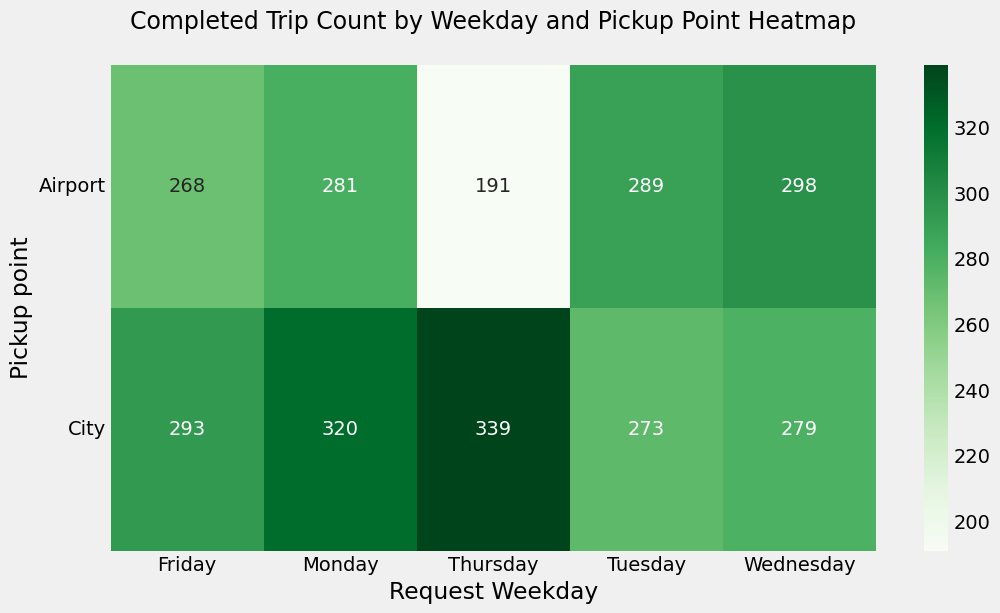

In [41]:
plt.figure( figsize = (11,6))
sns.heatmap(res2, annot = True, cmap='Greens', fmt='.3g')
plt.title("Completed Trip Count by Weekday and Pickup Point Heatmap" + "\n", fontsize = 17)
plt.yticks(rotation = 0)
plt.show()

However, there are only 5 dates which are being reported in the given data set. Therefore, it would be inadequate to conclude anything (e.g. Supply going from City is highest on Thursday) based on insufficient data.

### Pickup Point by Hour Analysis

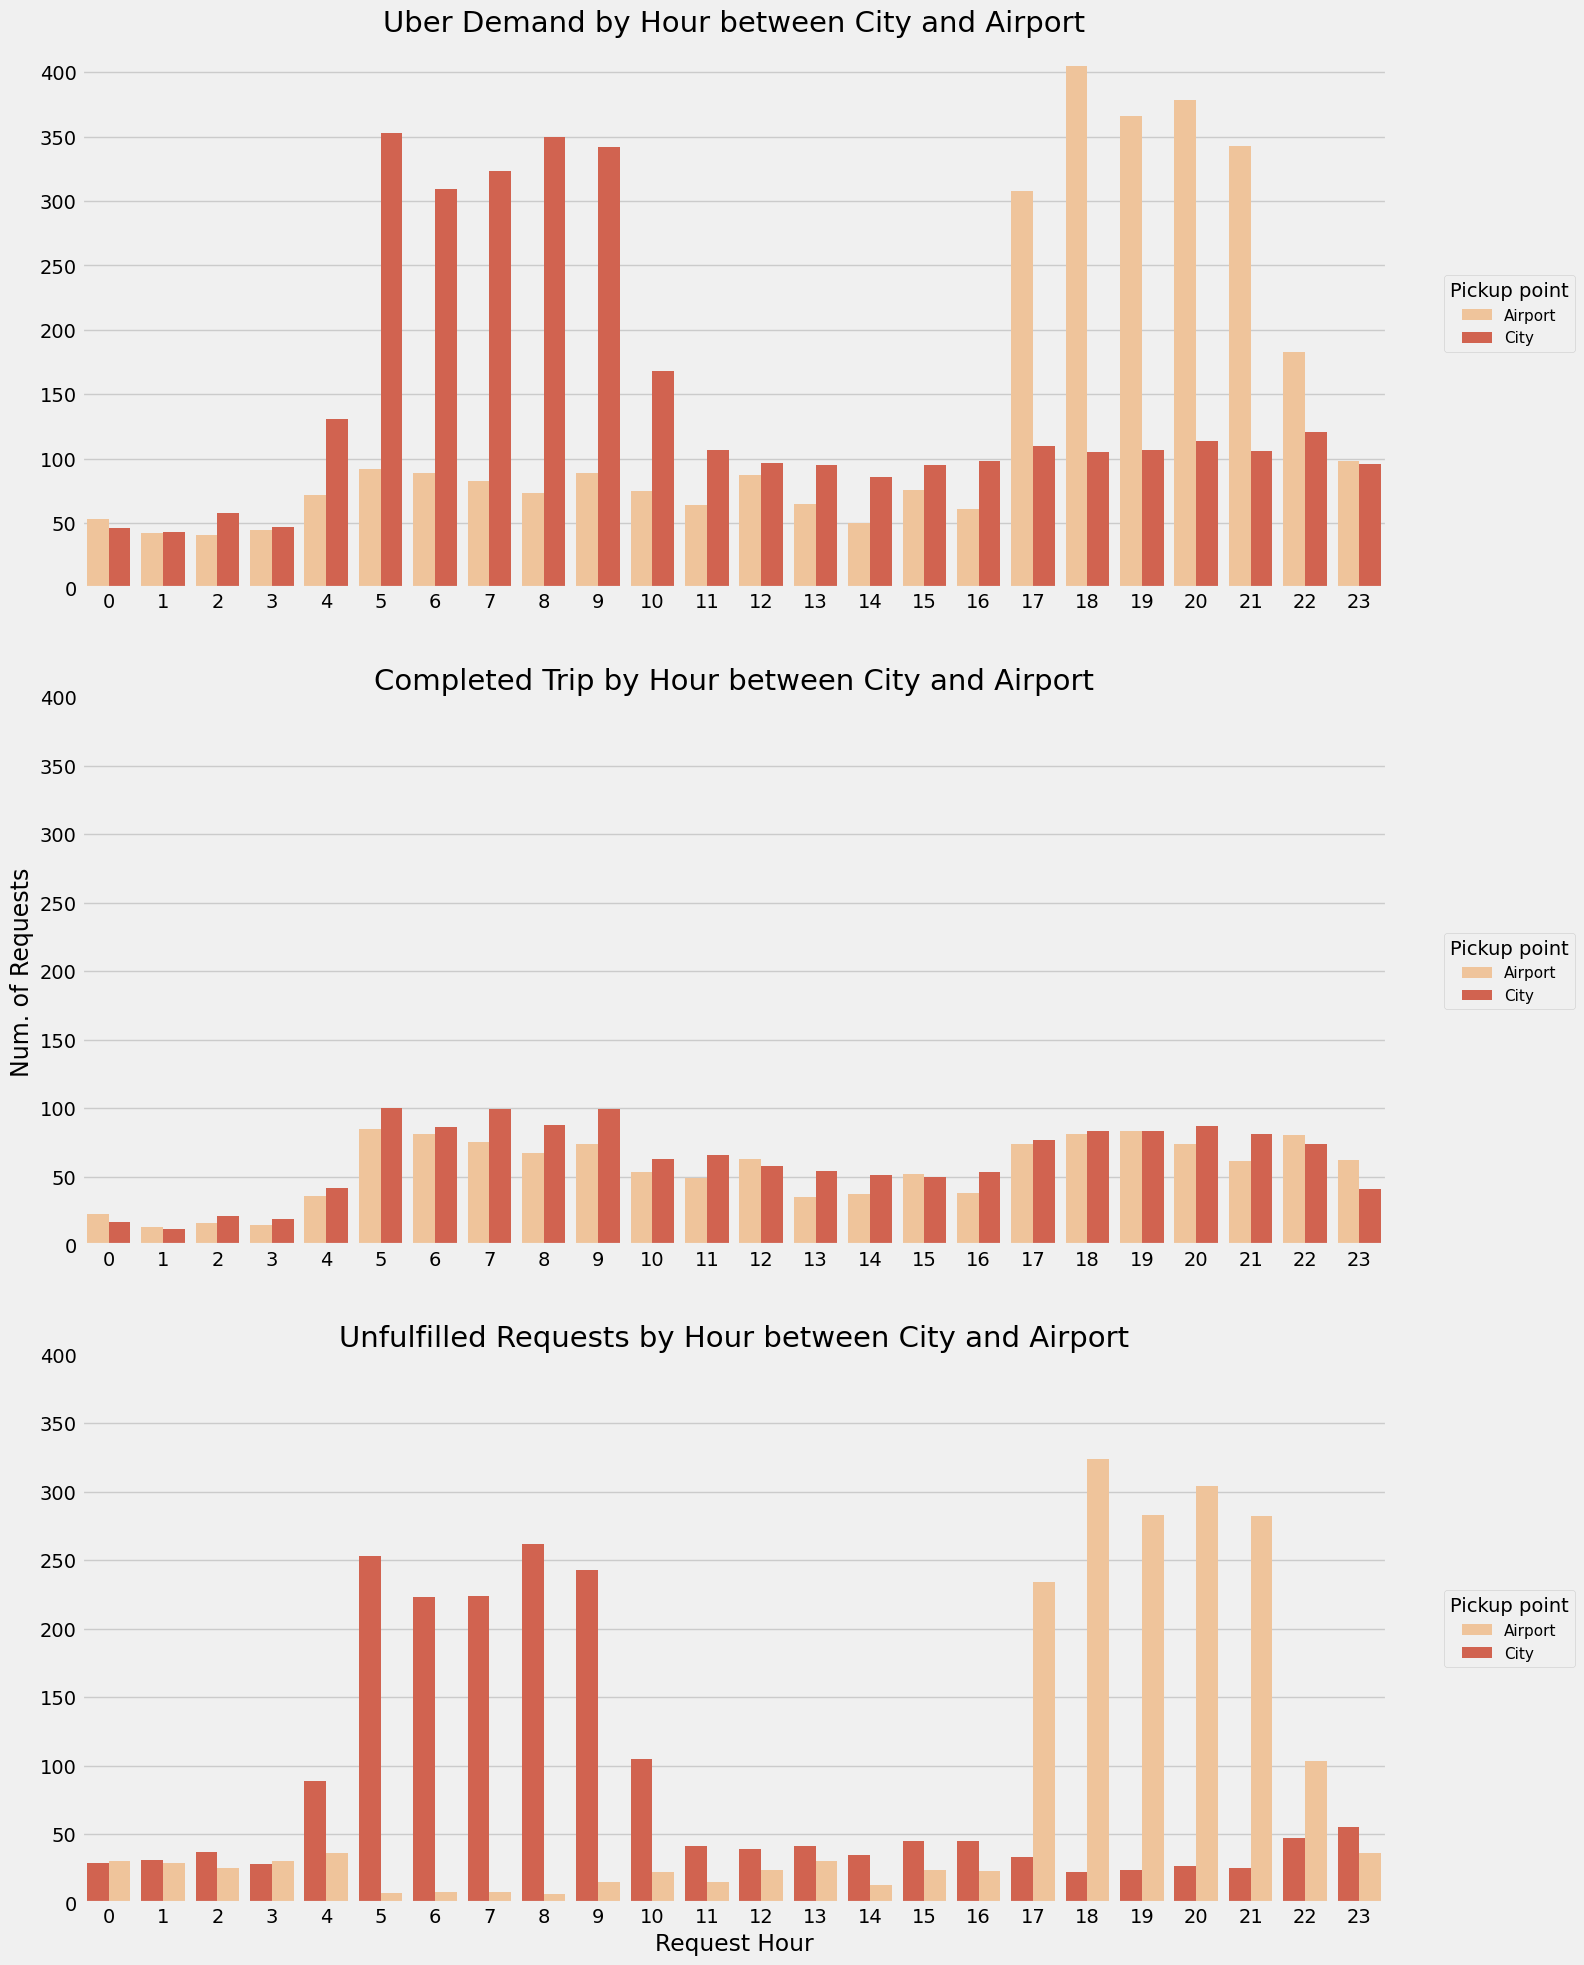

In [42]:
plt.figure( figsize = (15,23))


# Peak Hour Chart
plt.subplot(3,1,1)
ax1 = sns.countplot(x = 'Request Hour', hue = 'Pickup point', data = df1, palette = "OrRd")
ax1.set(xlabel = None, ylabel = None)
plt.legend(title = "Pickup point", bbox_to_anchor = (1.15, 0.5), loc = "right", fontsize = 11)
plt.title("Uber Demand by Hour between City and Airport", fontsize = 21)


# Trip Completed between City and Airport
plt.subplot(3,1,2)
plt.title("\n"+"Completed Trip by Hour between City and Airport", fontsize = 21)
ax2 = sns.countplot(x = 'Request Hour', hue = 'Pickup point', data = df1[df['Status'] == "Trip Completed"], palette = "OrRd")
ax2.set(xlabel = None)
ax2.set_ylim(0, 400)
plt.legend(title = "Pickup point", bbox_to_anchor = (1.15, 0.5), loc = "right", fontsize = 11)
plt.ylabel("Num. of Requests", fontsize = 17)


# Trip Incompleted between City and Airport
plt.subplot(3,1,3)
ax3 = sns.countplot(x = 'Request Hour', hue = 'Pickup point', data = df1[df['Status'].isin(["No Cars Available", "Cancelled"])], palette = "OrRd_r")
ax3.set(ylabel = None)
ax3.set_ylim(0, 400)
plt.legend(title = "Pickup point", bbox_to_anchor = (1.15, 0.5), loc = "right", fontsize = 11)
plt.title("\n"+"Unfulfilled Requests by Hour between City and Airport", fontsize = 21)

# Change the order of items in legend box for ax3
handles, labels = plt.gca().get_legend_handles_labels()
# specify order of items in legend
order = [1,0]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order]\
           ,title = "Pickup point"\
           , bbox_to_anchor = (1.15, 0.5)\
           , loc = "right"\
           , fontsize = 11)


plt.show()

In [55]:
# Average time from request to dropoff between City and Airport
t = df1['Drop timestamp'] - df1['Request timestamp']
print("On average, a trip from/to City/Airport takes: ", t.mean())

On average, a trip from/to City/Airport takes:  0 days 00:52:24.825150123
